In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
"""
精确率（precision）：表示模型预测为正类的样本中，实际为正类的比例。高精确率意味着模型将正类样本的误判率降低。

召回率（recall）：表示实际为正类的样本中，模型正确预测为正类的比例。高召回率意味着模型对正类样本的识别能力较好。

F1-Score：综合考虑了精确率和召回率的平衡指标。F1-Score越高，模型在精确率和召回率之间取得的平衡效果就越好。

支持度（support）：表示每个类别在真实标签中的样本数量。

准确率（accuracy）：表示模型在所有样本上预测正确的比例。

宏平均（macro average）：计算精确率、召回率和F1-Score的平均值，并且不考虑类别之间的样本分布。宏平均平等地对待每个类别。

加权平均（weighted average）：根据每个类别的支持度加权计算精确率、召回率和F1-Score的平均值，考虑了不同类别样本的分布情况。
"""

In [19]:
data3 = pd.read_csv("D:/projtest2023/mq5/buytype_H1.csv")
data3.head()

,Unnamed: 0,index,time,open,high,low,close,tick_volume,spread,real_volume,ATR,Stoploss,Stopprofit,Profit,Type
0,0,14,2015-11-17 21:00:00,6.40711,6.40849,6.40700,6.40829,558,71,167100000,0.002706,6.407137,6.409843,0.002887,1.0
1,1,15,2015-11-17 22:00:00,6.40798,6.40886,6.40759,6.40841,358,67,232320000,0.002604,6.407558,6.410162,0.002568,1.0
2,2,16,2015-11-17 23:00:00,6.40849,6.40979,6.40801,6.40924,217,66,110160000,0.002545,6.408518,6.411062,0.001668,1.0
3,3,17,2015-11-18 00:00:00,6.41169,6.41273,6.41061,6.41239,196,0,219532000,0.002612,6.411424,6.414036,0.003354,1.0
4,4,18,2015-11-18 01:00:00,6.41252,6.41269,6.41006,6.41142,285,57,166141000,0.002614,6.411383,6.413997,0.003393,1.0


In [21]:
data3 = data3.drop(['Unnamed: 0', 'index', 'time', 'Profit'], axis=1, inplace=False)
data3 = data3.dropna(axis=0)
data3.head()

,open,high,low,close,tick_volume,spread,real_volume,ATR,Stoploss,Stopprofit,Type
0,6.40711,6.40849,6.40700,6.40829,558,71,167100000,0.002706,6.407137,6.409843,1.0
1,6.40798,6.40886,6.40759,6.40841,358,67,232320000,0.002604,6.407558,6.410162,1.0
2,6.40849,6.40979,6.40801,6.40924,217,66,110160000,0.002545,6.408518,6.411062,1.0
3,6.41169,6.41273,6.41061,6.41239,196,0,219532000,0.002612,6.411424,6.414036,1.0
4,6.41252,6.41269,6.41006,6.41142,285,57,166141000,0.002614,6.411383,6.413997,1.0


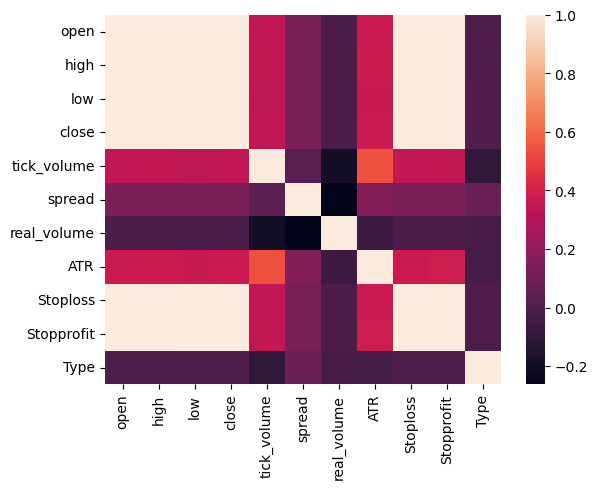

In [23]:
#绘制热度图：
corrdata = data3.corr()
plot=sns.heatmap(corrdata)
 
plt.show()

In [30]:
#特征和标签
X = data3.drop(columns = ['Type'])
Y = data3['Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 3)
params = {
    'iterations': 1000,
    'learning_rate': 0.03,
    'depth': 6,
    'loss_function': 'Logloss',
    'cat_features': [],
    'eval_metric':'Accuracy',
    'verbose':2,
    'custom_metric':['Accuracy', 'AUC']  
}

model = CatBoostClassifier(**params )
model.fit(X_train, Y_train)

0:	learn: 0.5534994	total: 8.34ms	remaining: 8.33s
2:	learn: 0.5622610	total: 21.3ms	remaining: 7.06s
4:	learn: 0.5638010	total: 32.7ms	remaining: 6.5s
6:	learn: 0.5653675	total: 43.9ms	remaining: 6.23s
8:	learn: 0.5669074	total: 53.6ms	remaining: 5.9s
10:	learn: 0.5648364	total: 63.5ms	remaining: 5.71s
12:	learn: 0.5656861	total: 73.2ms	remaining: 5.56s
14:	learn: 0.5669339	total: 82.4ms	remaining: 5.41s
16:	learn: 0.5657392	total: 91.5ms	remaining: 5.29s
18:	learn: 0.5656330	total: 101ms	remaining: 5.21s
20:	learn: 0.5653144	total: 111ms	remaining: 5.17s
22:	learn: 0.5655268	total: 120ms	remaining: 5.11s
24:	learn: 0.5661374	total: 130ms	remaining: 5.06s
26:	learn: 0.5659250	total: 139ms	remaining: 5.02s
28:	learn: 0.5651551	total: 149ms	remaining: 4.97s
30:	learn: 0.5658985	total: 158ms	remaining: 4.93s
32:	learn: 0.5658454	total: 167ms	remaining: 4.9s
34:	learn: 0.5657923	total: 177ms	remaining: 4.88s
36:	learn: 0.5661374	total: 186ms	remaining: 4.84s
38:	learn: 0.5654471	total: 19

340:	learn: 0.5934579	total: 1.65s	remaining: 3.19s
342:	learn: 0.5937234	total: 1.66s	remaining: 3.18s
344:	learn: 0.5941748	total: 1.67s	remaining: 3.17s
346:	learn: 0.5943607	total: 1.68s	remaining: 3.16s
348:	learn: 0.5948917	total: 1.69s	remaining: 3.15s
350:	learn: 0.5951837	total: 1.7s	remaining: 3.14s
352:	learn: 0.5949979	total: 1.71s	remaining: 3.13s
354:	learn: 0.5950775	total: 1.72s	remaining: 3.12s
356:	learn: 0.5955023	total: 1.73s	remaining: 3.11s
358:	learn: 0.5954492	total: 1.74s	remaining: 3.1s
360:	learn: 0.5958740	total: 1.75s	remaining: 3.09s
362:	learn: 0.5959537	total: 1.75s	remaining: 3.08s
364:	learn: 0.5961395	total: 1.76s	remaining: 3.07s
366:	learn: 0.5960864	total: 1.77s	remaining: 3.06s
368:	learn: 0.5965644	total: 1.78s	remaining: 3.05s
370:	learn: 0.5963520	total: 1.79s	remaining: 3.04s
372:	learn: 0.5967768	total: 1.8s	remaining: 3.03s
374:	learn: 0.5969361	total: 1.81s	remaining: 3.02s
376:	learn: 0.5973078	total: 1.82s	remaining: 3.01s
378:	learn: 0.5

686:	learn: 0.6277082	total: 3.33s	remaining: 1.52s
688:	learn: 0.6281064	total: 3.34s	remaining: 1.51s
690:	learn: 0.6279206	total: 3.35s	remaining: 1.5s
692:	learn: 0.6280268	total: 3.36s	remaining: 1.49s
694:	learn: 0.6282923	total: 3.37s	remaining: 1.48s
696:	learn: 0.6285843	total: 3.37s	remaining: 1.47s
698:	learn: 0.6291153	total: 3.38s	remaining: 1.46s
700:	learn: 0.6293543	total: 3.39s	remaining: 1.45s
702:	learn: 0.6295932	total: 3.4s	remaining: 1.44s
704:	learn: 0.6298056	total: 3.41s	remaining: 1.43s
706:	learn: 0.6300446	total: 3.42s	remaining: 1.42s
708:	learn: 0.6304694	total: 3.43s	remaining: 1.41s
710:	learn: 0.6302305	total: 3.44s	remaining: 1.4s
712:	learn: 0.6302039	total: 3.45s	remaining: 1.39s
714:	learn: 0.6302305	total: 3.46s	remaining: 1.38s
716:	learn: 0.6302836	total: 3.46s	remaining: 1.37s
718:	learn: 0.6305491	total: 3.47s	remaining: 1.36s
720:	learn: 0.6307349	total: 3.48s	remaining: 1.35s
722:	learn: 0.6308411	total: 3.49s	remaining: 1.34s
724:	learn: 0.6

In [31]:
#test
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)

Accuracy: 0.601784007645747 f1: 0.5484104046242775 recall: 0.491792656587473 precision: 0.6197604790419161


In [32]:
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred)
cmatrix

array([[3390, 1397],
       [2353, 2277]], dtype=int64)

In [33]:
#特征重要性分析
feature_importance = model.get_feature_importance()
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance}")

open: 9.166093965810935
high: 5.209785776868364
low: 3.9571908179552002
close: 16.997056633354806
tick_volume: 15.041610454310142
spread: 15.205753047171662
real_volume: 3.9650306124601506
ATR: 16.084316946930244
Stoploss: 7.427633515572625
Stopprofit: 6.945528229565869


In [60]:
# 创建数据集对象
train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test)


params = {
    'iterations': 1000,
    'learning_rate': 0.03,
    'depth': 6,
    'loss_function': 'Logloss',
    'early_stopping_rounds': 5,
    'eval_metric':'Accuracy'
}
# 创建 CatBoost 分类器
model = CatBoostClassifier(**params)

# 执行交叉验证
cv_data = cv(train_pool, model.get_params(), fold_count=5)

# 获取最好的迭代次数
best_iteration = cv_data['test-Logloss-mean'].idxmin()

Training on fold [0/5]
0:	learn: 0.5626763	test: 0.5555556	best: 0.5555556 (0)	total: 13ms	remaining: 12.9s
1:	learn: 0.5629418	test: 0.5558211	best: 0.5558211 (1)	total: 24.6ms	remaining: 12.3s
2:	learn: 0.5632073	test: 0.5539626	best: 0.5558211 (1)	total: 42.3ms	remaining: 14.1s
3:	learn: 0.5638711	test: 0.5531661	best: 0.5558211 (1)	total: 74.7ms	remaining: 18.6s
4:	learn: 0.5653314	test: 0.5531661	best: 0.5558211 (1)	total: 86.8ms	remaining: 17.3s
5:	learn: 0.5666589	test: 0.5518386	best: 0.5558211 (1)	total: 98.3ms	remaining: 16.3s
6:	learn: 0.5654641	test: 0.5513076	best: 0.5558211 (1)	total: 133ms	remaining: 18.9s

bestTest = 0.555821054
bestIteration = 1

Training on fold [1/5]
0:	learn: 0.5629750	test: 0.5612638	best: 0.5612638 (0)	total: 11.6ms	remaining: 11.6s
1:	learn: 0.5616143	test: 0.5575468	best: 0.5612638 (0)	total: 23.2ms	remaining: 11.6s
2:	learn: 0.5638047	test: 0.5562193	best: 0.5612638 (0)	total: 37.1ms	remaining: 12.3s
3:	learn: 0.5627427	test: 0.5592725	best: 0.

In [61]:
best_iteration

12

In [62]:
params = {
    'iterations': best_iteration,
    'learning_rate': 0.03,
    'depth': 6,
    'loss_function': 'Logloss',
    'early_stopping_rounds': 5,
    'eval_metric':'Accuracy'
}
# 使用最好的迭代次数重新训练模型
model = CatBoostClassifier(iterations=best_iteration, learning_rate=0.1, depth=6)
model.fit(train_pool)

# 对测试集进行预测和评分
predictions = model.predict(test_pool)
# Y_test_pool = Pool(Y_test)


accuracy_score = accuracy_score(predictions, Y_test)
# 输出评分结果

print("Score:", accuracy_score)

0:	learn: 0.6905333	total: 4.85ms	remaining: 53.3ms
1:	learn: 0.6881129	total: 9.23ms	remaining: 46.1ms
2:	learn: 0.6861535	total: 13.3ms	remaining: 39.9ms
3:	learn: 0.6846787	total: 17.1ms	remaining: 34.3ms
4:	learn: 0.6832968	total: 21ms	remaining: 29.4ms
5:	learn: 0.6821771	total: 24.8ms	remaining: 24.8ms
6:	learn: 0.6811338	total: 28.6ms	remaining: 20.4ms
7:	learn: 0.6804011	total: 32.2ms	remaining: 16.1ms
8:	learn: 0.6796487	total: 35.7ms	remaining: 11.9ms
9:	learn: 0.6790666	total: 39.4ms	remaining: 7.88ms
10:	learn: 0.6784367	total: 43.3ms	remaining: 3.93ms
11:	learn: 0.6778710	total: 47.2ms	remaining: 0us


TypeError: 'numpy.float64' object is not callable

In [ ]:
"""
iterations：迭代次数，表示要训练的树的数量。默认值为1000。
learning_rate：学习率，控制每棵树权重的更新幅度。默认值为0.03。
depth：树的最大深度，控制模型的复杂度。默认值为6。
loss_function：损失函数，用于优化模型参数的目标函数。默认值为对数损失函数('Logloss')。
cat_features：类别特征的索引列表。CatBoost可以自动处理类别特征，但需要指定它们的索引。默认值为空列表([])，即没有类别特征。
eval_metric：评估指标，用于衡量模型性能的指标。默认值为多类别分类问题的'MultiClass'。
random_seed：随机种子，用于控制模型的随机性，可复现结果。默认值为None。
early_stopping_rounds：提前停止的轮数。如果验证集上的性能在连续的early_stopping_rounds轮中没有改善，则停止训练。默认值为None，表示不使用提前停止。
custom_loss：自定义损失函数。可以传递自定义的损失函数来更好地适应特定任务。默认值为None。
verbose：控制训练过程中的详细程度。默认值为True，输出训练过程中的信息。
eval_metric：Accuracy：准确率，用于分类问题的评估，表示分类正确的样本占总样本的比例。
            Logloss'：对数损失函数，适合二分类和多分类问题，用于衡量预测概率与真实标签之间的差异。
            AUC：ROC曲线下面积，常用于二分类问题的评估，表示正类样本排在负类样本前面的概率。
            F1：F1-Score，综合考虑了模型的精确率和召回率，适用于不平衡数据集的分类问题。
"""
params = {
    'iterations': 100,
    'learning_rate': 0.03,
    'depth': 6,
    'loss_function': 'Logloss',
    'early_stopping_rounds': 5,
    'eval_metric':'Accuracy'
}

In [64]:
# 创建数据集对象
train_pool = Pool(X_train, Y_train)

# 定义参数网格
params_grid = {
    'iterations': [1000, 2000,3000],
    'learning_rate': [0.02, 0.003, 0.005],
    'depth': [6, 8, 10],
    'l2_leaf_reg':[0.01,0.02,0.05],
    'random_strength':[10,20,30],
    'bagging_temperature':[0.5,0.6,0.7]
}

# 设置其他固定参数
fixed_params = {
    
}

# 执行网格搜索
model = CatBoostClassifier(**fixed_params)
grid_search_result = model.grid_search(params_grid, train_pool)

# 输出最佳参数组合和对应的指标结果
print("grid_search_result: ")
print(grid_search_result)


0:	learn: 0.6926978	test: 0.6926378	best: 0.6926378 (0)	total: 38.4ms	remaining: 38.4s
1:	learn: 0.6921714	test: 0.6920766	best: 0.6920766 (1)	total: 77.5ms	remaining: 38.7s
2:	learn: 0.6917986	test: 0.6916795	best: 0.6916795 (2)	total: 117ms	remaining: 38.8s
3:	learn: 0.6913547	test: 0.6912380	best: 0.6912380 (3)	total: 152ms	remaining: 37.9s
4:	learn: 0.6908765	test: 0.6907843	best: 0.6907843 (4)	total: 191ms	remaining: 38s
5:	learn: 0.6905639	test: 0.6905161	best: 0.6905161 (5)	total: 230ms	remaining: 38.2s
6:	learn: 0.6902328	test: 0.6901703	best: 0.6901703 (6)	total: 266ms	remaining: 37.8s
7:	learn: 0.6899017	test: 0.6898029	best: 0.6898029 (7)	total: 292ms	remaining: 36.2s
8:	learn: 0.6895174	test: 0.6894218	best: 0.6894218 (8)	total: 328ms	remaining: 36.1s
9:	learn: 0.6891504	test: 0.6890710	best: 0.6890710 (9)	total: 361ms	remaining: 35.7s
10:	learn: 0.6886750	test: 0.6885639	best: 0.6885639 (10)	total: 399ms	remaining: 35.9s
11:	learn: 0.6884025	test: 0.6882911	best: 0.6882911

97:	learn: 0.6768437	test: 0.6766028	best: 0.6766028 (97)	total: 2.99s	remaining: 27.5s
98:	learn: 0.6767607	test: 0.6765245	best: 0.6765245 (98)	total: 3s	remaining: 27.3s
99:	learn: 0.6766803	test: 0.6764525	best: 0.6764525 (99)	total: 3.01s	remaining: 27.1s
100:	learn: 0.6766395	test: 0.6764121	best: 0.6764121 (100)	total: 3.04s	remaining: 27.1s
101:	learn: 0.6766354	test: 0.6764102	best: 0.6764102 (101)	total: 3.08s	remaining: 27.1s
102:	learn: 0.6765403	test: 0.6763329	best: 0.6763329 (102)	total: 3.12s	remaining: 27.1s
103:	learn: 0.6764779	test: 0.6762448	best: 0.6762448 (103)	total: 3.15s	remaining: 27.1s
104:	learn: 0.6764051	test: 0.6761590	best: 0.6761590 (104)	total: 3.18s	remaining: 27.1s
105:	learn: 0.6763872	test: 0.6761373	best: 0.6761373 (105)	total: 3.2s	remaining: 27s
106:	learn: 0.6762792	test: 0.6760333	best: 0.6760333 (106)	total: 3.22s	remaining: 26.9s
107:	learn: 0.6762200	test: 0.6759602	best: 0.6759602 (107)	total: 3.26s	remaining: 26.9s
108:	learn: 0.6761441	

189:	learn: 0.6733327	test: 0.6737570	best: 0.6737423 (188)	total: 5.72s	remaining: 24.4s
190:	learn: 0.6733270	test: 0.6737600	best: 0.6737423 (188)	total: 5.73s	remaining: 24.3s
191:	learn: 0.6732988	test: 0.6737143	best: 0.6737143 (191)	total: 5.77s	remaining: 24.3s
192:	learn: 0.6732874	test: 0.6737030	best: 0.6737030 (192)	total: 5.81s	remaining: 24.3s
193:	learn: 0.6732858	test: 0.6736956	best: 0.6736956 (193)	total: 5.84s	remaining: 24.3s
194:	learn: 0.6732701	test: 0.6736798	best: 0.6736798 (194)	total: 5.88s	remaining: 24.3s
195:	learn: 0.6732262	test: 0.6736457	best: 0.6736457 (195)	total: 5.92s	remaining: 24.3s
196:	learn: 0.6732062	test: 0.6736300	best: 0.6736300 (196)	total: 5.95s	remaining: 24.3s
197:	learn: 0.6731929	test: 0.6736201	best: 0.6736201 (197)	total: 5.96s	remaining: 24.1s
198:	learn: 0.6731421	test: 0.6736072	best: 0.6736072 (198)	total: 5.98s	remaining: 24.1s
199:	learn: 0.6731419	test: 0.6736058	best: 0.6736058 (199)	total: 6s	remaining: 24s
200:	learn: 0.6

288:	learn: 0.6711502	test: 0.6722896	best: 0.6722896 (288)	total: 8.18s	remaining: 20.1s
289:	learn: 0.6711430	test: 0.6722823	best: 0.6722823 (289)	total: 8.19s	remaining: 20s
290:	learn: 0.6711176	test: 0.6722892	best: 0.6722823 (289)	total: 8.2s	remaining: 20s
291:	learn: 0.6711066	test: 0.6722745	best: 0.6722745 (291)	total: 8.24s	remaining: 20s
292:	learn: 0.6710973	test: 0.6722701	best: 0.6722701 (292)	total: 8.28s	remaining: 20s
293:	learn: 0.6710707	test: 0.6722361	best: 0.6722361 (293)	total: 8.32s	remaining: 20s
294:	learn: 0.6710642	test: 0.6722275	best: 0.6722275 (294)	total: 8.36s	remaining: 20s
295:	learn: 0.6710448	test: 0.6722296	best: 0.6722275 (294)	total: 8.38s	remaining: 19.9s
296:	learn: 0.6710133	test: 0.6722174	best: 0.6722174 (296)	total: 8.4s	remaining: 19.9s
297:	learn: 0.6709937	test: 0.6722028	best: 0.6722028 (297)	total: 8.43s	remaining: 19.9s
298:	learn: 0.6709741	test: 0.6721883	best: 0.6721883 (298)	total: 8.47s	remaining: 19.9s
299:	learn: 0.6709632	te

384:	learn: 0.6692793	test: 0.6715619	best: 0.6715619 (384)	total: 11s	remaining: 17.5s
385:	learn: 0.6692746	test: 0.6715669	best: 0.6715619 (384)	total: 11s	remaining: 17.5s
386:	learn: 0.6692527	test: 0.6715718	best: 0.6715619 (384)	total: 11s	remaining: 17.5s
387:	learn: 0.6692411	test: 0.6715608	best: 0.6715608 (387)	total: 11.1s	remaining: 17.4s
388:	learn: 0.6692258	test: 0.6715738	best: 0.6715608 (387)	total: 11.1s	remaining: 17.4s
389:	learn: 0.6692114	test: 0.6715559	best: 0.6715559 (389)	total: 11.1s	remaining: 17.4s
390:	learn: 0.6692049	test: 0.6715580	best: 0.6715559 (389)	total: 11.2s	remaining: 17.4s
391:	learn: 0.6691988	test: 0.6715547	best: 0.6715547 (391)	total: 11.2s	remaining: 17.4s
392:	learn: 0.6691707	test: 0.6715321	best: 0.6715321 (392)	total: 11.2s	remaining: 17.3s
393:	learn: 0.6691623	test: 0.6715222	best: 0.6715222 (393)	total: 11.2s	remaining: 17.3s
394:	learn: 0.6691194	test: 0.6714791	best: 0.6714791 (394)	total: 11.3s	remaining: 17.3s
395:	learn: 0.66

476:	learn: 0.6676551	test: 0.6709054	best: 0.6709039 (475)	total: 13.7s	remaining: 15s
477:	learn: 0.6676538	test: 0.6709053	best: 0.6709039 (475)	total: 13.7s	remaining: 14.9s
478:	learn: 0.6676503	test: 0.6709059	best: 0.6709039 (475)	total: 13.7s	remaining: 14.9s
479:	learn: 0.6676377	test: 0.6709128	best: 0.6709039 (475)	total: 13.7s	remaining: 14.9s
480:	learn: 0.6676212	test: 0.6709042	best: 0.6709039 (475)	total: 13.8s	remaining: 14.9s
481:	learn: 0.6676094	test: 0.6709002	best: 0.6709002 (481)	total: 13.8s	remaining: 14.8s
482:	learn: 0.6675909	test: 0.6708811	best: 0.6708811 (482)	total: 13.8s	remaining: 14.8s
483:	learn: 0.6675830	test: 0.6708780	best: 0.6708780 (483)	total: 13.9s	remaining: 14.8s
484:	learn: 0.6675688	test: 0.6708835	best: 0.6708780 (483)	total: 13.9s	remaining: 14.7s
485:	learn: 0.6675564	test: 0.6708859	best: 0.6708780 (483)	total: 13.9s	remaining: 14.7s
486:	learn: 0.6675358	test: 0.6708663	best: 0.6708663 (486)	total: 13.9s	remaining: 14.7s
487:	learn: 

571:	learn: 0.6661364	test: 0.6702797	best: 0.6702739 (566)	total: 16.5s	remaining: 12.3s
572:	learn: 0.6661268	test: 0.6702812	best: 0.6702739 (566)	total: 16.5s	remaining: 12.3s
573:	learn: 0.6661050	test: 0.6702766	best: 0.6702739 (566)	total: 16.6s	remaining: 12.3s
574:	learn: 0.6660909	test: 0.6702655	best: 0.6702655 (574)	total: 16.6s	remaining: 12.3s
575:	learn: 0.6660713	test: 0.6702656	best: 0.6702655 (574)	total: 16.6s	remaining: 12.2s
576:	learn: 0.6660514	test: 0.6702650	best: 0.6702650 (576)	total: 16.7s	remaining: 12.2s
577:	learn: 0.6660144	test: 0.6702680	best: 0.6702650 (576)	total: 16.7s	remaining: 12.2s
578:	learn: 0.6659916	test: 0.6702419	best: 0.6702419 (578)	total: 16.7s	remaining: 12.2s
579:	learn: 0.6659598	test: 0.6702329	best: 0.6702329 (579)	total: 16.8s	remaining: 12.1s
580:	learn: 0.6659500	test: 0.6702379	best: 0.6702329 (579)	total: 16.8s	remaining: 12.1s
581:	learn: 0.6658977	test: 0.6702094	best: 0.6702094 (581)	total: 16.8s	remaining: 12.1s
582:	learn

670:	learn: 0.6622267	test: 0.6690002	best: 0.6690002 (670)	total: 19.5s	remaining: 9.54s
671:	learn: 0.6621515	test: 0.6689740	best: 0.6689740 (671)	total: 19.5s	remaining: 9.51s
672:	learn: 0.6620835	test: 0.6689475	best: 0.6689475 (672)	total: 19.5s	remaining: 9.47s
673:	learn: 0.6619919	test: 0.6688818	best: 0.6688818 (673)	total: 19.5s	remaining: 9.44s
674:	learn: 0.6619103	test: 0.6688332	best: 0.6688332 (674)	total: 19.6s	remaining: 9.41s
675:	learn: 0.6618351	test: 0.6687962	best: 0.6687962 (675)	total: 19.6s	remaining: 9.39s
676:	learn: 0.6617976	test: 0.6687853	best: 0.6687853 (676)	total: 19.6s	remaining: 9.37s
677:	learn: 0.6617204	test: 0.6687526	best: 0.6687526 (677)	total: 19.7s	remaining: 9.34s
678:	learn: 0.6616889	test: 0.6687429	best: 0.6687429 (678)	total: 19.7s	remaining: 9.3s
679:	learn: 0.6616397	test: 0.6687194	best: 0.6687194 (679)	total: 19.7s	remaining: 9.27s
680:	learn: 0.6615829	test: 0.6686792	best: 0.6686792 (680)	total: 19.7s	remaining: 9.24s
681:	learn:

764:	learn: 0.6562661	test: 0.6665927	best: 0.6665927 (764)	total: 22.4s	remaining: 6.87s
765:	learn: 0.6562181	test: 0.6665702	best: 0.6665702 (765)	total: 22.4s	remaining: 6.84s
766:	learn: 0.6561433	test: 0.6665607	best: 0.6665607 (766)	total: 22.4s	remaining: 6.81s
767:	learn: 0.6560547	test: 0.6665213	best: 0.6665213 (767)	total: 22.4s	remaining: 6.78s
768:	learn: 0.6559763	test: 0.6664918	best: 0.6664918 (768)	total: 22.5s	remaining: 6.75s
769:	learn: 0.6558968	test: 0.6664394	best: 0.6664394 (769)	total: 22.5s	remaining: 6.72s
770:	learn: 0.6558404	test: 0.6664153	best: 0.6664153 (770)	total: 22.6s	remaining: 6.7s
771:	learn: 0.6558014	test: 0.6664033	best: 0.6664033 (771)	total: 22.6s	remaining: 6.67s
772:	learn: 0.6557149	test: 0.6663880	best: 0.6663880 (772)	total: 22.6s	remaining: 6.64s
773:	learn: 0.6556642	test: 0.6663668	best: 0.6663668 (773)	total: 22.6s	remaining: 6.61s
774:	learn: 0.6556023	test: 0.6663379	best: 0.6663379 (774)	total: 22.7s	remaining: 6.58s
775:	learn:

858:	learn: 0.6507396	test: 0.6649599	best: 0.6649599 (858)	total: 25.3s	remaining: 4.16s
859:	learn: 0.6506577	test: 0.6649528	best: 0.6649528 (859)	total: 25.3s	remaining: 4.13s
860:	learn: 0.6506129	test: 0.6649490	best: 0.6649490 (860)	total: 25.4s	remaining: 4.1s
861:	learn: 0.6505438	test: 0.6649415	best: 0.6649415 (861)	total: 25.4s	remaining: 4.07s
862:	learn: 0.6504642	test: 0.6649258	best: 0.6649258 (862)	total: 25.5s	remaining: 4.04s
863:	learn: 0.6503834	test: 0.6649255	best: 0.6649255 (863)	total: 25.5s	remaining: 4.01s
864:	learn: 0.6503257	test: 0.6649128	best: 0.6649128 (864)	total: 25.5s	remaining: 3.98s
865:	learn: 0.6502554	test: 0.6649088	best: 0.6649088 (865)	total: 25.6s	remaining: 3.96s
866:	learn: 0.6502226	test: 0.6648892	best: 0.6648892 (866)	total: 25.6s	remaining: 3.92s
867:	learn: 0.6501382	test: 0.6648290	best: 0.6648290 (867)	total: 25.6s	remaining: 3.9s
868:	learn: 0.6500842	test: 0.6648134	best: 0.6648134 (868)	total: 25.7s	remaining: 3.87s
869:	learn: 

954:	learn: 0.6453953	test: 0.6636060	best: 0.6636060 (954)	total: 28.2s	remaining: 1.33s
955:	learn: 0.6453114	test: 0.6636047	best: 0.6636047 (955)	total: 28.3s	remaining: 1.3s
956:	learn: 0.6452200	test: 0.6635772	best: 0.6635772 (956)	total: 28.3s	remaining: 1.27s
957:	learn: 0.6451560	test: 0.6635680	best: 0.6635680 (957)	total: 28.3s	remaining: 1.24s
958:	learn: 0.6451156	test: 0.6635742	best: 0.6635680 (957)	total: 28.3s	remaining: 1.21s
959:	learn: 0.6450766	test: 0.6635837	best: 0.6635680 (957)	total: 28.4s	remaining: 1.18s
960:	learn: 0.6450398	test: 0.6635733	best: 0.6635680 (957)	total: 28.4s	remaining: 1.15s
961:	learn: 0.6449982	test: 0.6635544	best: 0.6635544 (961)	total: 28.4s	remaining: 1.12s
962:	learn: 0.6449612	test: 0.6635127	best: 0.6635127 (962)	total: 28.5s	remaining: 1.09s
963:	learn: 0.6449492	test: 0.6634922	best: 0.6634922 (963)	total: 28.5s	remaining: 1.06s
964:	learn: 0.6449063	test: 0.6634880	best: 0.6634880 (964)	total: 28.5s	remaining: 1.03s
965:	learn:

54:	learn: 0.6895708	test: 0.6894558	best: 0.6894558 (54)	total: 1.44s	remaining: 24.7s
55:	learn: 0.6895079	test: 0.6893935	best: 0.6893935 (55)	total: 1.45s	remaining: 24.4s
56:	learn: 0.6894518	test: 0.6893373	best: 0.6893373 (56)	total: 1.46s	remaining: 24.1s
57:	learn: 0.6893970	test: 0.6892875	best: 0.6892875 (57)	total: 1.49s	remaining: 24.3s
58:	learn: 0.6893453	test: 0.6892393	best: 0.6892393 (58)	total: 1.53s	remaining: 24.4s
59:	learn: 0.6892766	test: 0.6891703	best: 0.6891703 (59)	total: 1.57s	remaining: 24.6s
60:	learn: 0.6892070	test: 0.6890980	best: 0.6890980 (60)	total: 1.61s	remaining: 24.8s
61:	learn: 0.6891404	test: 0.6890278	best: 0.6890278 (61)	total: 1.65s	remaining: 24.9s
62:	learn: 0.6891006	test: 0.6889877	best: 0.6889877 (62)	total: 1.66s	remaining: 24.7s
63:	learn: 0.6890157	test: 0.6889002	best: 0.6889002 (63)	total: 1.67s	remaining: 24.5s
64:	learn: 0.6889521	test: 0.6888340	best: 0.6888340 (64)	total: 1.71s	remaining: 24.6s
65:	learn: 0.6888985	test: 0.688

152:	learn: 0.6849143	test: 0.6847215	best: 0.6847215 (152)	total: 4.38s	remaining: 24.3s
153:	learn: 0.6848793	test: 0.6846854	best: 0.6846854 (153)	total: 4.4s	remaining: 24.2s
154:	learn: 0.6848658	test: 0.6846738	best: 0.6846738 (154)	total: 4.43s	remaining: 24.2s
155:	learn: 0.6848421	test: 0.6846477	best: 0.6846477 (155)	total: 4.47s	remaining: 24.2s
156:	learn: 0.6848026	test: 0.6846067	best: 0.6846067 (156)	total: 4.51s	remaining: 24.2s
157:	learn: 0.6847746	test: 0.6845774	best: 0.6845774 (157)	total: 4.54s	remaining: 24.2s
158:	learn: 0.6847563	test: 0.6845559	best: 0.6845559 (158)	total: 4.58s	remaining: 24.2s
159:	learn: 0.6847168	test: 0.6845112	best: 0.6845112 (159)	total: 4.62s	remaining: 24.3s
160:	learn: 0.6846787	test: 0.6844764	best: 0.6844764 (160)	total: 4.63s	remaining: 24.1s
161:	learn: 0.6846361	test: 0.6844323	best: 0.6844323 (161)	total: 4.66s	remaining: 24.1s
162:	learn: 0.6845968	test: 0.6843949	best: 0.6843949 (162)	total: 4.69s	remaining: 24.1s
163:	learn:

247:	learn: 0.6820371	test: 0.6817574	best: 0.6817574 (247)	total: 7.28s	remaining: 22.1s
248:	learn: 0.6820070	test: 0.6817238	best: 0.6817238 (248)	total: 7.29s	remaining: 22s
249:	learn: 0.6820036	test: 0.6817202	best: 0.6817202 (249)	total: 7.31s	remaining: 21.9s
250:	learn: 0.6819788	test: 0.6816924	best: 0.6816924 (250)	total: 7.35s	remaining: 21.9s
251:	learn: 0.6819576	test: 0.6816644	best: 0.6816644 (251)	total: 7.39s	remaining: 21.9s
252:	learn: 0.6819416	test: 0.6816479	best: 0.6816479 (252)	total: 7.43s	remaining: 21.9s
253:	learn: 0.6819233	test: 0.6816289	best: 0.6816289 (253)	total: 7.46s	remaining: 21.9s
254:	learn: 0.6819032	test: 0.6816044	best: 0.6816044 (254)	total: 7.49s	remaining: 21.9s
255:	learn: 0.6818808	test: 0.6815822	best: 0.6815822 (255)	total: 7.5s	remaining: 21.8s
256:	learn: 0.6818515	test: 0.6815520	best: 0.6815520 (256)	total: 7.51s	remaining: 21.7s
257:	learn: 0.6818174	test: 0.6815224	best: 0.6815224 (257)	total: 7.55s	remaining: 21.7s
258:	learn: 0

KeyboardInterrupt: 

# 11

In [190]:

data = pd.read_csv("D:/projtest2023/mq5/buytype_H1.csv")

data = data.drop(['Unnamed: 0', 'index', 'time', 'real_volume'], axis=1, inplace=False)
data = data.dropna(axis=0)

#特征和标签
X = data.drop(columns = ['Type'])
#标准化StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = data['Type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1)

[[-1.26791066 -1.27666154 -1.27345011 ... -0.06004774 -1.27489448
  -1.27839479]
 [-1.28129002 -1.28519859 -1.278914   ... -0.06300193 -1.28337391
  -1.28698906]
 [-1.27803346 -1.26996505 -1.26959788 ...  0.0445813  -1.26819009
  -1.27170631]
 ...
 [ 2.18671039  2.17473484  2.18731205 ... -0.01338651  2.17872188
   2.170717  ]
 [ 2.18051115  2.17634043  2.19576338 ... -0.01338651  2.18062536
   2.17202581]
 [ 2.19071243  2.18589566  2.19843636 ... -0.01338651  2.1903063
   2.18145562]]


In [67]:
model = CatBoostClassifier( )
model.fit(X_train, Y_train)

Learning rate set to 0.048515
0:	learn: 0.6910278	total: 242ms	remaining: 4m 1s
1:	learn: 0.6890306	total: 492ms	remaining: 4m 5s
2:	learn: 0.6871439	total: 836ms	remaining: 4m 37s
3:	learn: 0.6854726	total: 1.04s	remaining: 4m 19s
4:	learn: 0.6839941	total: 1.38s	remaining: 4m 35s
5:	learn: 0.6827425	total: 1.7s	remaining: 4m 40s
6:	learn: 0.6816020	total: 2.04s	remaining: 4m 48s
7:	learn: 0.6803047	total: 2.36s	remaining: 4m 52s
8:	learn: 0.6791671	total: 2.55s	remaining: 4m 40s
9:	learn: 0.6781669	total: 2.86s	remaining: 4m 43s
10:	learn: 0.6771841	total: 3.09s	remaining: 4m 37s
11:	learn: 0.6764095	total: 3.46s	remaining: 4m 45s
12:	learn: 0.6755696	total: 3.8s	remaining: 4m 48s
13:	learn: 0.6748568	total: 4.11s	remaining: 4m 49s
14:	learn: 0.6741486	total: 4.45s	remaining: 4m 52s
15:	learn: 0.6734177	total: 4.78s	remaining: 4m 54s
16:	learn: 0.6728405	total: 5.17s	remaining: 4m 59s
17:	learn: 0.6723008	total: 5.47s	remaining: 4m 58s
18:	learn: 0.6717500	total: 5.75s	remaining: 4m 

158:	learn: 0.6464779	total: 49.8s	remaining: 4m 23s
159:	learn: 0.6463942	total: 50.1s	remaining: 4m 23s
160:	learn: 0.6461853	total: 50.4s	remaining: 4m 22s
161:	learn: 0.6460946	total: 50.7s	remaining: 4m 22s
162:	learn: 0.6459861	total: 50.9s	remaining: 4m 21s
163:	learn: 0.6458482	total: 51.2s	remaining: 4m 20s
164:	learn: 0.6457063	total: 51.5s	remaining: 4m 20s
165:	learn: 0.6455659	total: 51.8s	remaining: 4m 20s
166:	learn: 0.6454055	total: 52.1s	remaining: 4m 20s
167:	learn: 0.6453042	total: 52.5s	remaining: 4m 20s
168:	learn: 0.6451652	total: 52.9s	remaining: 4m 19s
169:	learn: 0.6449946	total: 53.3s	remaining: 4m 20s
170:	learn: 0.6448687	total: 53.7s	remaining: 4m 20s
171:	learn: 0.6447796	total: 54s	remaining: 4m 20s
172:	learn: 0.6446617	total: 54.4s	remaining: 4m 20s
173:	learn: 0.6445232	total: 54.8s	remaining: 4m 20s
174:	learn: 0.6443800	total: 55.1s	remaining: 4m 19s
175:	learn: 0.6442235	total: 55.5s	remaining: 4m 19s
176:	learn: 0.6440861	total: 55.8s	remaining: 4m

312:	learn: 0.6246384	total: 1m 37s	remaining: 3m 33s
313:	learn: 0.6244847	total: 1m 37s	remaining: 3m 33s
314:	learn: 0.6243294	total: 1m 37s	remaining: 3m 32s
315:	learn: 0.6241851	total: 1m 38s	remaining: 3m 32s
316:	learn: 0.6240060	total: 1m 38s	remaining: 3m 31s
317:	learn: 0.6238673	total: 1m 38s	remaining: 3m 31s
318:	learn: 0.6237359	total: 1m 38s	remaining: 3m 31s
319:	learn: 0.6235664	total: 1m 39s	remaining: 3m 30s
320:	learn: 0.6233873	total: 1m 39s	remaining: 3m 30s
321:	learn: 0.6232568	total: 1m 39s	remaining: 3m 30s
322:	learn: 0.6230968	total: 1m 40s	remaining: 3m 30s
323:	learn: 0.6229576	total: 1m 40s	remaining: 3m 29s
324:	learn: 0.6228203	total: 1m 40s	remaining: 3m 29s
325:	learn: 0.6226623	total: 1m 41s	remaining: 3m 29s
326:	learn: 0.6225095	total: 1m 41s	remaining: 3m 29s
327:	learn: 0.6223878	total: 1m 41s	remaining: 3m 28s
328:	learn: 0.6222597	total: 1m 42s	remaining: 3m 28s
329:	learn: 0.6221322	total: 1m 42s	remaining: 3m 28s
330:	learn: 0.6220312	total:

466:	learn: 0.6037679	total: 2m 24s	remaining: 2m 45s
467:	learn: 0.6036277	total: 2m 25s	remaining: 2m 45s
468:	learn: 0.6034926	total: 2m 25s	remaining: 2m 44s
469:	learn: 0.6033722	total: 2m 25s	remaining: 2m 44s
470:	learn: 0.6032118	total: 2m 26s	remaining: 2m 44s
471:	learn: 0.6030891	total: 2m 26s	remaining: 2m 43s
472:	learn: 0.6029961	total: 2m 26s	remaining: 2m 43s
473:	learn: 0.6028339	total: 2m 26s	remaining: 2m 43s
474:	learn: 0.6027047	total: 2m 27s	remaining: 2m 42s
475:	learn: 0.6025656	total: 2m 27s	remaining: 2m 42s
476:	learn: 0.6024487	total: 2m 27s	remaining: 2m 41s
477:	learn: 0.6022967	total: 2m 27s	remaining: 2m 41s
478:	learn: 0.6021494	total: 2m 28s	remaining: 2m 41s
479:	learn: 0.6020329	total: 2m 28s	remaining: 2m 40s
480:	learn: 0.6019450	total: 2m 28s	remaining: 2m 40s
481:	learn: 0.6018255	total: 2m 29s	remaining: 2m 40s
482:	learn: 0.6017044	total: 2m 29s	remaining: 2m 40s
483:	learn: 0.6016102	total: 2m 29s	remaining: 2m 39s
484:	learn: 0.6015045	total:

620:	learn: 0.5858584	total: 3m 12s	remaining: 1m 57s
621:	learn: 0.5857216	total: 3m 13s	remaining: 1m 57s
622:	learn: 0.5856116	total: 3m 13s	remaining: 1m 57s
623:	learn: 0.5854857	total: 3m 13s	remaining: 1m 56s
624:	learn: 0.5853867	total: 3m 14s	remaining: 1m 56s
625:	learn: 0.5852645	total: 3m 14s	remaining: 1m 56s
626:	learn: 0.5851566	total: 3m 14s	remaining: 1m 55s
627:	learn: 0.5850447	total: 3m 15s	remaining: 1m 55s
628:	learn: 0.5849304	total: 3m 15s	remaining: 1m 55s
629:	learn: 0.5848176	total: 3m 15s	remaining: 1m 54s
630:	learn: 0.5847079	total: 3m 16s	remaining: 1m 54s
631:	learn: 0.5846330	total: 3m 16s	remaining: 1m 54s
632:	learn: 0.5845350	total: 3m 16s	remaining: 1m 54s
633:	learn: 0.5844380	total: 3m 17s	remaining: 1m 53s
634:	learn: 0.5843226	total: 3m 17s	remaining: 1m 53s
635:	learn: 0.5841814	total: 3m 17s	remaining: 1m 53s
636:	learn: 0.5840760	total: 3m 18s	remaining: 1m 52s
637:	learn: 0.5840220	total: 3m 18s	remaining: 1m 52s
638:	learn: 0.5838705	total:

773:	learn: 0.5696106	total: 4m 1s	remaining: 1m 10s
774:	learn: 0.5695131	total: 4m 1s	remaining: 1m 10s
775:	learn: 0.5693647	total: 4m 1s	remaining: 1m 9s
776:	learn: 0.5692978	total: 4m 1s	remaining: 1m 9s
777:	learn: 0.5692191	total: 4m 2s	remaining: 1m 9s
778:	learn: 0.5691307	total: 4m 2s	remaining: 1m 8s
779:	learn: 0.5690208	total: 4m 2s	remaining: 1m 8s
780:	learn: 0.5689485	total: 4m 3s	remaining: 1m 8s
781:	learn: 0.5688451	total: 4m 3s	remaining: 1m 7s
782:	learn: 0.5687428	total: 4m 3s	remaining: 1m 7s
783:	learn: 0.5686593	total: 4m 4s	remaining: 1m 7s
784:	learn: 0.5685746	total: 4m 4s	remaining: 1m 6s
785:	learn: 0.5684698	total: 4m 4s	remaining: 1m 6s
786:	learn: 0.5683436	total: 4m 5s	remaining: 1m 6s
787:	learn: 0.5682680	total: 4m 5s	remaining: 1m 6s
788:	learn: 0.5681597	total: 4m 5s	remaining: 1m 5s
789:	learn: 0.5680632	total: 4m 5s	remaining: 1m 5s
790:	learn: 0.5679906	total: 4m 6s	remaining: 1m 5s
791:	learn: 0.5679417	total: 4m 6s	remaining: 1m 4s
792:	learn

930:	learn: 0.5542043	total: 4m 49s	remaining: 21.5s
931:	learn: 0.5541170	total: 4m 49s	remaining: 21.1s
932:	learn: 0.5539731	total: 4m 50s	remaining: 20.8s
933:	learn: 0.5538927	total: 4m 50s	remaining: 20.5s
934:	learn: 0.5537838	total: 4m 50s	remaining: 20.2s
935:	learn: 0.5536938	total: 4m 50s	remaining: 19.9s
936:	learn: 0.5536033	total: 4m 51s	remaining: 19.6s
937:	learn: 0.5534716	total: 4m 51s	remaining: 19.3s
938:	learn: 0.5533589	total: 4m 51s	remaining: 18.9s
939:	learn: 0.5532371	total: 4m 52s	remaining: 18.6s
940:	learn: 0.5531160	total: 4m 52s	remaining: 18.3s
941:	learn: 0.5530048	total: 4m 52s	remaining: 18s
942:	learn: 0.5529552	total: 4m 53s	remaining: 17.7s
943:	learn: 0.5528399	total: 4m 53s	remaining: 17.4s
944:	learn: 0.5527367	total: 4m 53s	remaining: 17.1s
945:	learn: 0.5526600	total: 4m 54s	remaining: 16.8s
946:	learn: 0.5525614	total: 4m 54s	remaining: 16.5s
947:	learn: 0.5524727	total: 4m 54s	remaining: 16.2s
948:	learn: 0.5523748	total: 4m 55s	remaining: 1

In [198]:
#test
y_pred = model.predict(X_test)
# predict_y = pd.Series(y_pred)

y_pred_int = y_pred.astype(int)

In [199]:
# y_pred = y_pred.astype(int)
# y_pred
y_pred_int[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [174]:
# Y_test = Y_test.values
# Y_test = Y_test.astype(int)

In [200]:
accuracy = accuracy_score(Y_test, y_pred_int)
f1 = f1_score(Y_test, y_pred_int)
recall = recall_score(Y_test, y_pred_int)
precision = precision_score(Y_test, y_pred_int)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)

Accuracy: 0.6524739859842854 f1: 0.6510288943384156 recall: 0.65684165232358 precision: 0.6453181145635172


In [202]:
# 创建数据集对象
train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test)
params = {
    'iterations': 1000,
    'learning_rate': 0.03,
    'depth': 6,
    'loss_function': 'Logloss',
    'early_stopping_rounds': 5,
    'eval_metric':'Accuracy'
}
# 创建 CatBoost 分类器
model_pool = CatBoostClassifier(**params)
model_pool.fit(train_pool)
#test
y_pred_pool = model_pool.predict(test_pool)
print(y_pred_pool)

0:	learn: 0.5713451	total: 249ms	remaining: 4m 9s
1:	learn: 0.5753803	total: 490ms	remaining: 4m 4s
2:	learn: 0.5758581	total: 771ms	remaining: 4m 16s
3:	learn: 0.5753272	total: 1.01s	remaining: 4m 12s
4:	learn: 0.5758581	total: 1.25s	remaining: 4m 8s
5:	learn: 0.5757785	total: 1.49s	remaining: 4m 6s
6:	learn: 0.5762032	total: 1.74s	remaining: 4m 6s
7:	learn: 0.5759643	total: 1.97s	remaining: 4m 4s
8:	learn: 0.5752476	total: 2.22s	remaining: 4m 4s
9:	learn: 0.5756458	total: 2.45s	remaining: 4m 2s
10:	learn: 0.5755396	total: 2.69s	remaining: 4m 2s
11:	learn: 0.5750352	total: 2.95s	remaining: 4m 3s
12:	learn: 0.5753272	total: 3.21s	remaining: 4m 3s
13:	learn: 0.5754599	total: 3.44s	remaining: 4m 2s
14:	learn: 0.5759643	total: 3.63s	remaining: 3m 58s
15:	learn: 0.5764953	total: 3.81s	remaining: 3m 54s
16:	learn: 0.5768935	total: 4.15s	remaining: 3m 59s
17:	learn: 0.5768138	total: 4.42s	remaining: 4m 1s
18:	learn: 0.5769200	total: 4.61s	remaining: 3m 58s
19:	learn: 0.5769466	total: 4.81s	r

158:	learn: 0.6050599	total: 36.8s	remaining: 3m 14s
159:	learn: 0.6051395	total: 37.1s	remaining: 3m 14s
160:	learn: 0.6049537	total: 37.3s	remaining: 3m 14s
161:	learn: 0.6050864	total: 37.5s	remaining: 3m 14s
162:	learn: 0.6053519	total: 37.7s	remaining: 3m 13s
163:	learn: 0.6055377	total: 37.9s	remaining: 3m 13s
164:	learn: 0.6057501	total: 38.2s	remaining: 3m 13s
165:	learn: 0.6053253	total: 38.5s	remaining: 3m 13s
166:	learn: 0.6055908	total: 38.8s	remaining: 3m 13s
167:	learn: 0.6056174	total: 39s	remaining: 3m 13s
168:	learn: 0.6059094	total: 39.1s	remaining: 3m 12s
169:	learn: 0.6060156	total: 39.4s	remaining: 3m 12s
170:	learn: 0.6061748	total: 39.6s	remaining: 3m 12s
171:	learn: 0.6061748	total: 39.9s	remaining: 3m 12s
172:	learn: 0.6059094	total: 40.1s	remaining: 3m 11s
173:	learn: 0.6063607	total: 40.4s	remaining: 3m 11s
174:	learn: 0.6071040	total: 40.5s	remaining: 3m 11s
175:	learn: 0.6076349	total: 40.8s	remaining: 3m 10s
176:	learn: 0.6074756	total: 41.1s	remaining: 3m

314:	learn: 0.6312087	total: 1m 13s	remaining: 2m 40s
315:	learn: 0.6312618	total: 1m 13s	remaining: 2m 40s
316:	learn: 0.6316069	total: 1m 14s	remaining: 2m 39s
317:	learn: 0.6319786	total: 1m 14s	remaining: 2m 39s
318:	learn: 0.6317662	total: 1m 14s	remaining: 2m 39s
319:	learn: 0.6321378	total: 1m 14s	remaining: 2m 39s
320:	learn: 0.6324564	total: 1m 14s	remaining: 2m 38s
321:	learn: 0.6325626	total: 1m 15s	remaining: 2m 38s
322:	learn: 0.6325360	total: 1m 15s	remaining: 2m 38s
323:	learn: 0.6327484	total: 1m 15s	remaining: 2m 37s
324:	learn: 0.6335448	total: 1m 15s	remaining: 2m 37s
325:	learn: 0.6333324	total: 1m 16s	remaining: 2m 37s
326:	learn: 0.6335714	total: 1m 16s	remaining: 2m 37s
327:	learn: 0.6340492	total: 1m 16s	remaining: 2m 36s
328:	learn: 0.6343412	total: 1m 16s	remaining: 2m 36s
329:	learn: 0.6341023	total: 1m 16s	remaining: 2m 36s
330:	learn: 0.6341554	total: 1m 17s	remaining: 2m 36s
331:	learn: 0.6342085	total: 1m 17s	remaining: 2m 35s
332:	learn: 0.6345536	total:

468:	learn: 0.6561363	total: 1m 48s	remaining: 2m 3s
469:	learn: 0.6560833	total: 1m 49s	remaining: 2m 2s
470:	learn: 0.6562956	total: 1m 49s	remaining: 2m 2s
471:	learn: 0.6561098	total: 1m 49s	remaining: 2m 2s
472:	learn: 0.6565080	total: 1m 49s	remaining: 2m 2s
473:	learn: 0.6568531	total: 1m 50s	remaining: 2m 2s
474:	learn: 0.6572248	total: 1m 50s	remaining: 2m 1s
475:	learn: 0.6572779	total: 1m 50s	remaining: 2m 1s
476:	learn: 0.6574637	total: 1m 50s	remaining: 2m 1s
477:	learn: 0.6579946	total: 1m 51s	remaining: 2m 1s
478:	learn: 0.6580212	total: 1m 51s	remaining: 2m 1s
479:	learn: 0.6584990	total: 1m 51s	remaining: 2m
480:	learn: 0.6590034	total: 1m 51s	remaining: 2m
481:	learn: 0.6590831	total: 1m 51s	remaining: 2m
482:	learn: 0.6588176	total: 1m 52s	remaining: 2m
483:	learn: 0.6590034	total: 1m 52s	remaining: 1m 59s
484:	learn: 0.6592689	total: 1m 52s	remaining: 1m 59s
485:	learn: 0.6594016	total: 1m 52s	remaining: 1m 59s
486:	learn: 0.6594282	total: 1m 53s	remaining: 1m 59s
4

622:	learn: 0.6781969	total: 2m 25s	remaining: 1m 28s
623:	learn: 0.6787810	total: 2m 25s	remaining: 1m 27s
624:	learn: 0.6791526	total: 2m 26s	remaining: 1m 27s
625:	learn: 0.6791261	total: 2m 26s	remaining: 1m 27s
626:	learn: 0.6793915	total: 2m 26s	remaining: 1m 27s
627:	learn: 0.6796570	total: 2m 26s	remaining: 1m 27s
628:	learn: 0.6796039	total: 2m 27s	remaining: 1m 26s
629:	learn: 0.6797367	total: 2m 27s	remaining: 1m 26s
630:	learn: 0.6799490	total: 2m 27s	remaining: 1m 26s
631:	learn: 0.6801614	total: 2m 27s	remaining: 1m 26s
632:	learn: 0.6801880	total: 2m 28s	remaining: 1m 25s
633:	learn: 0.6800021	total: 2m 28s	remaining: 1m 25s
634:	learn: 0.6801880	total: 2m 28s	remaining: 1m 25s
635:	learn: 0.6802145	total: 2m 28s	remaining: 1m 25s
636:	learn: 0.6806658	total: 2m 29s	remaining: 1m 24s
637:	learn: 0.6807454	total: 2m 29s	remaining: 1m 24s
638:	learn: 0.6809313	total: 2m 29s	remaining: 1m 24s
639:	learn: 0.6810640	total: 2m 29s	remaining: 1m 24s
640:	learn: 0.6809844	total:

777:	learn: 0.6983461	total: 3m 2s	remaining: 52s
778:	learn: 0.6984523	total: 3m 2s	remaining: 51.8s
779:	learn: 0.6990363	total: 3m 2s	remaining: 51.6s
780:	learn: 0.6991160	total: 3m 3s	remaining: 51.3s
781:	learn: 0.6991956	total: 3m 3s	remaining: 51.1s
782:	learn: 0.6991425	total: 3m 3s	remaining: 50.9s
783:	learn: 0.6993284	total: 3m 3s	remaining: 50.7s
784:	learn: 0.6994876	total: 3m 4s	remaining: 50.4s
785:	learn: 0.6994345	total: 3m 4s	remaining: 50.2s
786:	learn: 0.6996735	total: 3m 4s	remaining: 49.9s
787:	learn: 0.6998062	total: 3m 4s	remaining: 49.7s
788:	learn: 0.7000982	total: 3m 4s	remaining: 49.4s
789:	learn: 0.7001248	total: 3m 5s	remaining: 49.2s
790:	learn: 0.7004699	total: 3m 5s	remaining: 49s
791:	learn: 0.7006026	total: 3m 5s	remaining: 48.7s
792:	learn: 0.7008150	total: 3m 5s	remaining: 48.5s
793:	learn: 0.7010805	total: 3m 6s	remaining: 48.3s
794:	learn: 0.7013459	total: 3m 6s	remaining: 48s
795:	learn: 0.7016380	total: 3m 6s	remaining: 47.8s
796:	learn: 0.7017

934:	learn: 0.7143805	total: 3m 38s	remaining: 15.2s
935:	learn: 0.7144867	total: 3m 38s	remaining: 14.9s
936:	learn: 0.7144602	total: 3m 38s	remaining: 14.7s
937:	learn: 0.7148318	total: 3m 39s	remaining: 14.5s
938:	learn: 0.7149911	total: 3m 39s	remaining: 14.3s
939:	learn: 0.7152566	total: 3m 39s	remaining: 14s
940:	learn: 0.7154690	total: 3m 39s	remaining: 13.8s
941:	learn: 0.7154690	total: 3m 40s	remaining: 13.5s
942:	learn: 0.7156813	total: 3m 40s	remaining: 13.3s
943:	learn: 0.7159203	total: 3m 40s	remaining: 13.1s
944:	learn: 0.7157344	total: 3m 40s	remaining: 12.9s
945:	learn: 0.7158141	total: 3m 41s	remaining: 12.6s
946:	learn: 0.7157610	total: 3m 41s	remaining: 12.4s
947:	learn: 0.7157610	total: 3m 41s	remaining: 12.2s
948:	learn: 0.7157079	total: 3m 41s	remaining: 11.9s
949:	learn: 0.7159203	total: 3m 42s	remaining: 11.7s
950:	learn: 0.7159733	total: 3m 42s	remaining: 11.4s
951:	learn: 0.7162919	total: 3m 42s	remaining: 11.2s
952:	learn: 0.7164246	total: 3m 42s	remaining: 1

In [203]:
y_pred_int = y_pred_pool.astype(int)
accuracy = accuracy_score(Y_test, y_pred_int)
f1 = f1_score(Y_test, y_pred_int)
recall = recall_score(Y_test, y_pred_int)
precision = precision_score(Y_test, y_pred_int)
print("Accuracy:", accuracy,"f1:", f1,"recall:", recall,"precision:", precision)

Accuracy: 0.6387768103631344 f1: 0.6403805496828753 recall: 0.6516781411359724 precision: 0.6294679966749792


In [204]:
#混淆矩阵
cmatrix = confusion_matrix(Y_test, y_pred_int)
cmatrix

array([[2987, 1783],
       [1619, 3029]], dtype=int64)

In [205]:
2987/(2987+1783)

0.6262054507337527